In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

In [3]:
missing_data = '-'

In [4]:
db = pd.read_csv('ODI-2018_clean.csv')
db

,timestamp,programme,ML,IR,stat,DB,gender,chocolate,neighbours,stand,money,random,good(1),good(2),y_birth,m_birth,d_birth,h_bed,m_bed
0,4/5/2018 11:22:56,QRM,no,no,yes,no,male,neither,-,no,0,7,Productive,Good sleep,1994,10,12,0,0
1,4/5/2018 11:23:04,CS,no,no,-,yes,male,ignorant,-,yes,-,-,got a 8.5,got 2 8.5s,1993,6,8,0,0
2,4/5/2018 11:23:06,BA,yes,yes,no,yes,male,neither,5,no,-,6,Food,Sport,1992,12,25,20,44
3,4/5/2018 11:23:50,BA,yes,yes,yes,yes,male,ignorant,2,no,0,8,-,-,1995,1,2,0,0
4,4/5/2018 11:23:59,CS,no,no,no,yes,male,ignorant,6,no,0,8,sleep,beer,1994,9,1,-,-
5,4/5/2018 11:24:34,Drug Discovery and Safety,no,no,yes,no,male,fat,4,no,100,-,Chocolate,Doing nothing,1994,8,17,0,0
6,4/5/2018 11:25:25,CS,yes,yes,yes,no,male,neither,5,no,1,-,Chocolate,More chocolate,1993,9,27,9,0
7,4/5/2018 11:25:25,CLS,no,no,yes,yes,male,fat,5,yes,0,3,Sunshine,Friends,1994,5,14,0,0
8,4/5/2018 11:25:36,EOR,no,no,yes,no,male,neither,2,no,0,-,Sun,Rain,-,11,4,0,0
9,4/5/2018 11:25:51,Bioinformatics,yes,yes,-,yes,male,slim,7,no,0,5,Free time,More free time,1993,8,19,1,0


In [65]:
db.describe()

,timestamp,programme,ML,IR,stat,DB,gender,chocolate,neighbours,stand,money,random,good(1),good(2),y_birth,m_birth,d_birth,h_bed,m_bed
count,217,217,217,217,217,217,217,217,217,217,217,217,217,217,217,217,217,217,217
unique,102,20,3,3,3,3,3,5,10,3,34,12,136,156,14,13,32,11,18
top,4/5/2018 11:27:32,AI,yes,no,yes,no,male,fat,1,no,0,7,Sun,Food,-,5,9,0,0
freq,8,51,120,133,189,107,150,74,38,197,61,37,14,7,56,25,15,76,128


In [5]:
# data set with all rows dropped that include missing data
db_reduced = db.replace(missing_data, np.nan).dropna()

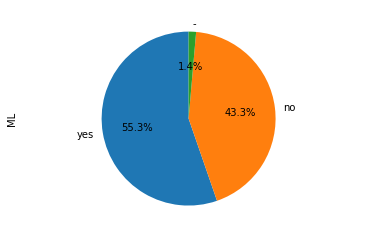

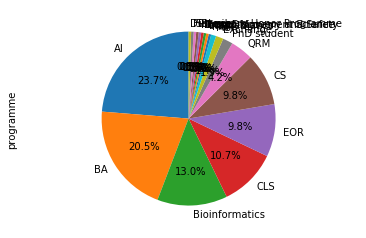

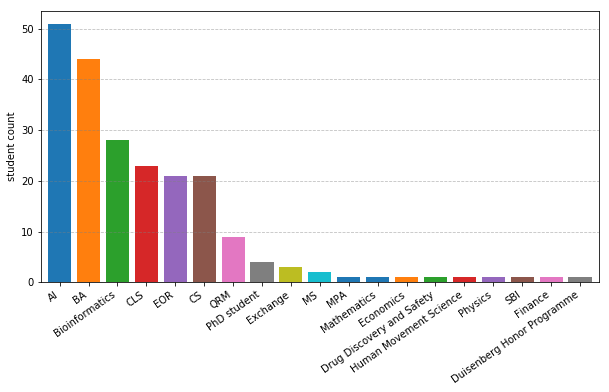

In [6]:
plt.figure()
plt.axis("equal")
db['ML'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, shadow=False, legend=False)
plt.show()

programmes = db.programme[db.programme != missing_data]

plt.figure()
plt.axis("equal")
programmes.value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, shadow=False, legend=False)
plt.show()

plt.figure(figsize=(10,5))
ax = programmes.value_counts().plot(kind='bar', width=0.8)
ax.grid(color='gray', linestyle='--', axis='y', alpha=0.5)
ax.set_ylabel('student count')
plt.xticks(ax.get_xticks(), rotation=35, ha='right')
plt.show()

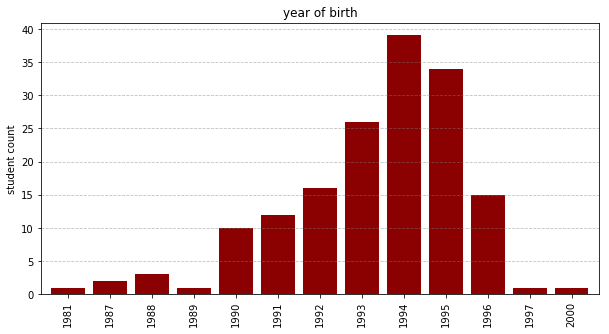

In [7]:
plt.figure(figsize=(10,5))
years = db.y_birth[db.y_birth != missing_data]
hist_years = years.value_counts().sort_index()
ax = hist_years.plot(kind='bar', width=0.8, color='darkred', title='year of birth')
ax.grid(color='gray', linestyle='--', axis='y', alpha=0.5)
ax.set_ylabel('student count')
plt.show()

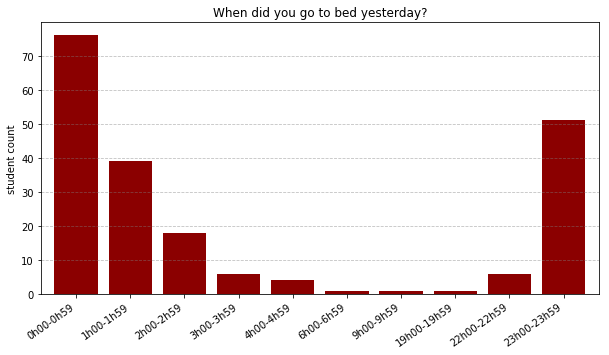

In [8]:
plt.figure(figsize=(10,5))
hours = db.h_bed[db.h_bed != missing_data].astype('float')
hist_hours = hours.value_counts().sort_index()
ax = hist_hours.plot(kind='bar', width=0.8, color='darkred', title='When did you go to bed yesterday?')
ax.grid(color='gray', linestyle='--', axis='y', alpha=0.5)
ax.set_ylabel('student count')
ax.set_xticklabels(['0h00-0h59','1h00-1h59','2h00-2h59','3h00-3h59','4h00-4h59','6h00-6h59','9h00-9h59','19h00-19h59','22h00-22h59','23h00-23h59'], rotation=35, ha='right')
plt.show()

In [9]:
money_programme = pd.DataFrame(db[['programme','money']], columns=['programme','money'])
money_programme = money_programme.replace(missing_data, np.nan)
money_programme.money = money_programme.money.apply(lambda x: x if float(x)<1000 else np.nan)
money_programme.dropna(inplace=True)

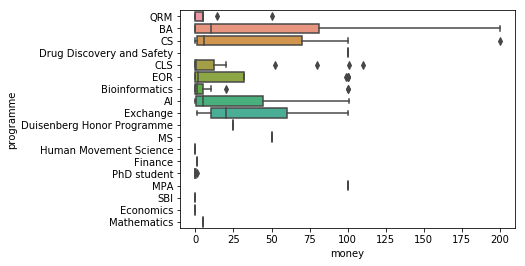

In [10]:
#money = db_reduced.money.astype(np.float)
#h_bed = db_reduced.h_bed.astype(np.float)
money = money_programme.money.astype(np.float)
programme = money_programme.programme

ax = sb.boxplot(y=programme, x=money)
#plt.xticks(ax.get_xticks(), rotation=35, ha='right')

In [11]:
money_ML = pd.DataFrame(db[['ML','money']], columns=['ML','money'])
money_ML = money_ML.replace(missing_data, np.nan)
money_ML.money = money_ML.money.apply(lambda x: x if float(x)<1000 else np.nan)
money_ML.dropna(inplace=True)

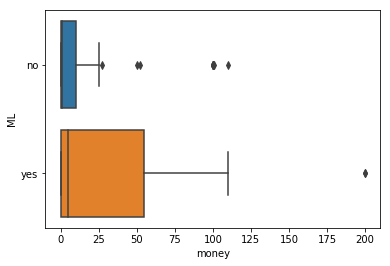

In [12]:
ax = sb.boxplot(y=money_ML.ML, x=money_ML.money.astype(np.float))

In [13]:
money_DB = pd.DataFrame(db[['DB','money']], columns=['DB','money'])
money_DB = money_DB.replace(missing_data, np.nan)
money_DB.money = money_DB.money.apply(lambda x: x if float(x)<1000 else np.nan)
money_DB.dropna(inplace=True)

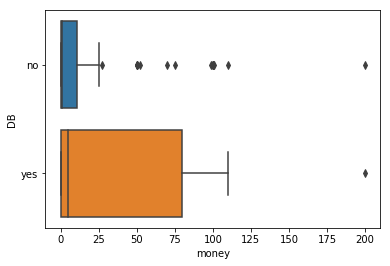

In [14]:
ax = sb.boxplot(y=money_DB.DB, x=money_DB.money.astype(np.float))

([<matplotlib.axis.XTick at 0x7f40f6d97dd8>,
 <a list of 6 Text xticklabel objects>)

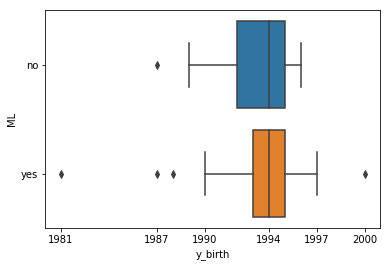

In [15]:
birth_ML = pd.DataFrame(db[['ML','y_birth']], columns=['ML','y_birth'])
birth_ML = birth_ML.replace(missing_data, np.nan).dropna()
ax = sb.boxplot(y=birth_ML.ML, x=birth_ML.y_birth.astype(np.int))
#plt.xticks(np.sort(birth_ML.y_birth.unique().astype(np.int)))
plt.xticks([1981,1987,1990,1994, 1997, 2000])


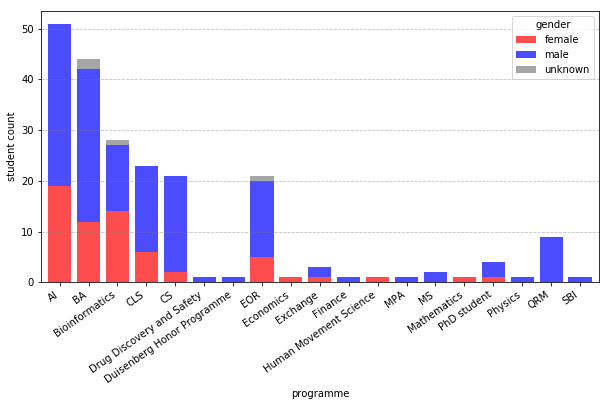

In [16]:
programme_gender_ct = pd.crosstab(db.programme.replace(missing_data, np.nan), db.gender.replace(missing_data, 'unknown'))

cmap = matplotlib.colors.ListedColormap(["red","blue","gray"], name='from_list', N=None)
ax = programme_gender_ct.dropna().plot(kind='bar', width=0.8, stacked=True, cmap=cmap, alpha=0.7, figsize=(10,5))
ax.grid(color='gray', linestyle='--', axis='y', alpha=0.5)
ax.set_ylabel('student count')
plt.xticks(ax.get_xticks(), rotation=35, ha='right')
plt.show()

In [66]:
programme_gender_ct

gender,female,male,unknown
programme,,,
AI,19,32,0
BA,12,30,2
Bioinformatics,14,13,1
CLS,6,17,0
CS,2,19,0
Drug Discovery and Safety,0,1,0
Duisenberg Honor Programme,0,1,0
EOR,5,15,1
Economics,1,0,0


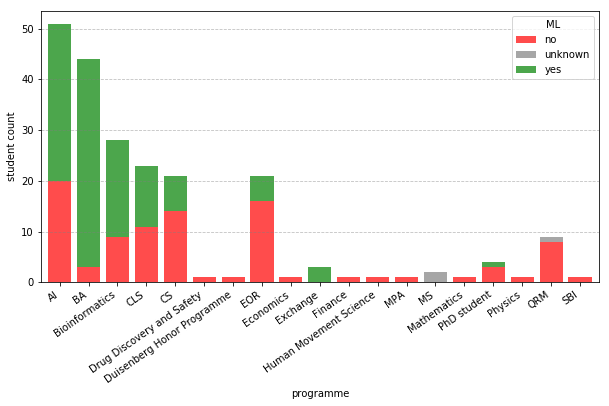

In [50]:
programme_ML_ct = pd.crosstab(db.programme.replace(missing_data, np.nan), db.ML.replace(missing_data, 'unknown'))

cmap = matplotlib.colors.ListedColormap(["red","gray","green"], name='from_list', N=None)
ax = programme_ML_ct.dropna().plot(kind='bar', width=0.8, stacked=True, cmap=cmap, alpha=0.7, figsize=(10,5))
ax.grid(color='gray', linestyle='--', axis='y', alpha=0.5)
ax.set_ylabel('student count')
plt.xticks(ax.get_xticks(), rotation=35, ha='right')
plt.show()

In [55]:
gender_ML_corr = pd.DataFrame(db[['gender','ML']].replace(missing_data, np.nan).dropna(), columns=['gender','ML'])
gender_ML_corr['ML'].replace('yes',1,inplace=True)
gender_ML_corr['ML'].replace('no',0,inplace=True)

gender_ML_corr.groupby(['gender'], as_index=False).mean().sort_values(by='ML',ascending=False)

,gender,ML
1,male,0.557823
0,female,0.539683


In [57]:
DB_ML_corr = pd.DataFrame(db[['DB','ML']].replace(missing_data, np.nan).dropna(), columns=['DB','ML'])
DB_ML_corr['ML'].replace('yes',1,inplace=True)
DB_ML_corr['ML'].replace('no',0,inplace=True)

DB_ML_corr.groupby(['DB'], as_index=False).mean().sort_values(by='ML',ascending=False)

,DB,ML
1,yes,0.730769
0,no,0.423077


In [67]:
stat_ML_corr = pd.DataFrame(db[['stat','ML']].replace(missing_data, np.nan).dropna(), columns=['stat','ML'])
stat_ML_corr['ML'].replace('yes',1,inplace=True)
stat_ML_corr['ML'].replace('no',0,inplace=True)

stat_ML_corr.groupby(['stat'], as_index=False).mean().sort_values(by='ML',ascending=False)

,stat,ML
0,no,0.565217
1,yes,0.564516


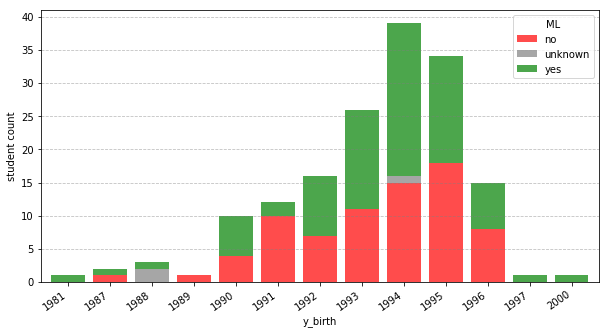

In [64]:
birth_ML_ct = pd.crosstab(db.y_birth.replace(missing_data, np.nan), db.ML.replace(missing_data, 'unknown'))

cmap = matplotlib.colors.ListedColormap(["red","gray","green"], name='from_list', N=None)
ax = birth_ML_ct.dropna().plot(kind='bar', width=0.8, stacked=True, cmap=cmap, alpha=0.7, figsize=(10,5))
ax.grid(color='gray', linestyle='--', axis='y', alpha=0.5)
ax.set_ylabel('student count')
plt.xticks(ax.get_xticks(), rotation=35, ha='right')
plt.show()

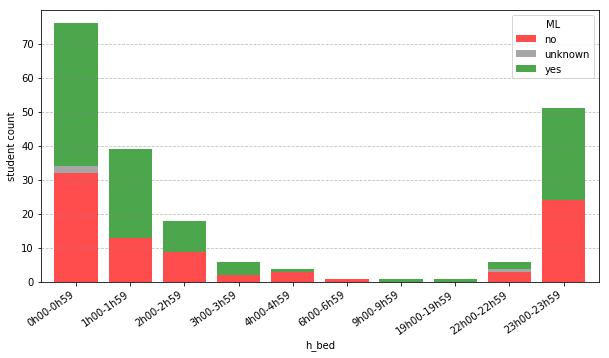

In [73]:
bedtime_ML_ct = pd.crosstab(db.h_bed.replace(missing_data, np.nan).astype('float'), db.ML.replace(missing_data, 'unknown')).dropna()

cmap = matplotlib.colors.ListedColormap(["red","gray","green"], name='from_list', N=None)
ax = bedtime_ML_ct.plot(kind='bar', width=0.8, stacked=True, cmap=cmap, alpha=0.7, figsize=(10,5))
ax.grid(color='gray', linestyle='--', axis='y', alpha=0.5)
ax.set_ylabel('student count')
plt.xticks(ax.get_xticks(), rotation=35, ha='right')
ax.set_xticklabels(['0h00-0h59','1h00-1h59','2h00-2h59','3h00-3h59','4h00-4h59','6h00-6h59','9h00-9h59','19h00-19h59','22h00-22h59','23h00-23h59'], rotation=35, ha='right')
plt.show()

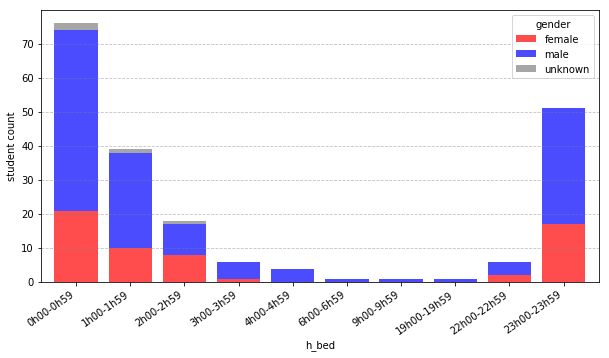

In [74]:
bedtime_gender_ct = pd.crosstab(db.h_bed.replace(missing_data, np.nan).astype('float'), db.gender.replace(missing_data, 'unknown')).dropna()

cmap = matplotlib.colors.ListedColormap(["red","blue","gray"], name='from_list', N=None)
ax = bedtime_gender_ct.plot(kind='bar', width=0.8, stacked=True, cmap=cmap, alpha=0.7, figsize=(10,5))
ax.grid(color='gray', linestyle='--', axis='y', alpha=0.5)
ax.set_ylabel('student count')
plt.xticks(ax.get_xticks(), rotation=35, ha='right')
ax.set_xticklabels(['0h00-0h59','1h00-1h59','2h00-2h59','3h00-3h59','4h00-4h59','6h00-6h59','9h00-9h59','19h00-19h59','22h00-22h59','23h00-23h59'], rotation=35, ha='right')
plt.show()

In [53]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

features1 = ['programme','DB','y_birth']
features2 = ['programme','DB','stat','gender']
features3 = ['programme','h_bed','y_birth']
target1 = 'ML'
target3 = 'gender'

features = features2
target = target1

columns = np.append(features, target)
classification_data = pd.DataFrame(db[columns].replace(missing_data, np.nan).dropna(), columns=columns)

# transform features to numerical categories
le = preprocessing.LabelEncoder()
for c in columns:
    classification_data[c] = le.fit_transform(classification_data[c])
    print(list(le.classes_))
    
# encode categorial features as multiple binary features
enc = preprocessing.OneHotEncoder()
binary_features = enc.fit_transform(classification_data[features])

['AI', 'BA', 'Bioinformatics', 'CLS', 'CS', 'Drug Discovery and Safety', 'Duisenberg Honor Programme', 'EOR', 'Economics', 'Exchange', 'Finance', 'Human Movement Science', 'MPA', 'Mathematics', 'PhD student', 'Physics', 'QRM']
['no', 'yes']
['no', 'yes']
['female', 'male']
['no', 'yes']


In [44]:
clf1 = DecisionTreeClassifier(random_state=0)
clf2 = LogisticRegression(random_state=0)
clf3 = RandomForestClassifier(random_state=0)
clf_list = [clf1, clf2, clf3]

for clf in clf_list:
    # compute model and perform 10-fold cross valdation (using the numerical features)
    scores = cross_val_score(clf, classification_data[features], classification_data[target], cv=10)
    print("cross-val scores:", scores)
    print("mean = ", np.mean(scores), ", std = ", np.std(scores), "\n")

    # compute model and perform 10-fold cross valdation (using the binary features)
    scores = cross_val_score(clf, binary_features, classification_data[target], cv=10)
    print("cross-val scores:", scores)
    print("mean = ", np.mean(scores), ", std = ", np.std(scores), "\n")

cross-val scores: [0.66666667 0.61904762 0.76190476 0.65       0.6        0.63157895
 0.57894737 0.68421053 0.68421053 0.63157895]
mean =  0.6508145363408521 , std =  0.04931504409697504 

cross-val scores: [0.66666667 0.61904762 0.76190476 0.7        0.6        0.63157895
 0.57894737 0.68421053 0.68421053 0.63157895]
mean =  0.6558145363408521 , std =  0.0514667680244065 

cross-val scores: [0.66666667 0.71428571 0.80952381 0.75       0.65       0.73684211
 0.52631579 0.68421053 0.63157895 0.73684211]
mean =  0.69062656641604 , std =  0.0743260919017496 

cross-val scores: [0.71428571 0.71428571 0.80952381 0.7        0.6        0.68421053
 0.52631579 0.78947368 0.78947368 0.68421053]
mean =  0.7011779448621553 , std =  0.08310574760745455 

cross-val scores: [0.71428571 0.61904762 0.76190476 0.65       0.75       0.63157895
 0.63157895 0.73684211 0.73684211 0.63157895]
mean =  0.6863659147869674 , std =  0.05521746927840726 

cross-val scores: [0.71428571 0.61904762 0.80952381 0.7    